# ADA AND BTC ANALYSIS AND TIMESERIES PREDICTION

# Introduction

Cardano is a cryptocurrency network and open source project that aims to run a public blockchain platform for smart contracts. Cardano's internal cryptocurrency is called Ada. The development of the project is overseen and supervised by the Cardano Foundation based in Zug, Switzerland.

The platform began development in 2015 and was launched in 2017 by Charles Hoskinson, a co-founder of Ethereum and BitShares. According to Hoskinson, he had left Ethereum after a dispute over keeping Ethereum nonprofit. After leaving he co-founded IOHK, a blockchain engineering company, whose primary business is the development of Cardano, alongside the Cardano Foundation and Emurgo.The platform is named after Gerolamo Cardano and the cryptocurrency after Ada Lovelace.

The currency debuted with a market cap of 600 million dollars. By the end of 2017, it had a market cap of 10 billion dollars, and reached a value of 33 billion dollars briefly in 2018 before a general tightening of the crypto market dropped its value back to 10 billion dollars. According to Mashable, Cardano claims that it overcomes existing problems in the crypto market: mainly that Bitcoin is too slow and inflexible, and that Ethereum is not safe or scalable. Cardano is considered a third-generation cryptocurrency by its creators.

# 1 Understand the problem and import the more important libraries

I want to compare ADA with BTC (Bitcoin) which all of you should know. If not: https://en.wikipedia.org/wiki/Bitcoin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First of all I downloaded both datasets and import them to the project. I took data from Jan 2018 ultil Feb 2021.

In [2]:
#Load de data
cardano_hst = pd.read_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Cardano/Cardano Historical Data - Investing - 2016.csv')
cardano_hst.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 20, 2021",1.149122,0.925955,1.176955,0.914190,1.80B,24.11%
1,"Feb 19, 2021",0.925894,0.913695,0.945353,0.880769,839.10M,1.33%
2,"Feb 18, 2021",0.913752,0.891719,0.956599,0.891719,904.68M,2.47%
3,"Feb 17, 2021",0.891702,0.870390,0.897079,0.823855,750.02M,2.45%
4,"Feb 16, 2021",0.870393,0.859853,0.905065,0.834791,929.87M,1.19%


We got the Closed attribute ase Price

In [3]:
bitcoin_hst = pd.read_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Cardano/Bitcoin Historical Data - Investing.com.csv', thousands=",")
bitcoin_hst.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 20, 2021",55923.7,55922.0,57523.8,54124.1,127.85K,0.03%
1,"Feb 19, 2021",55906.6,51590.1,56238.5,50816.8,139.43K,8.38%
2,"Feb 18, 2021",51582.2,52094.5,52524.0,50941.6,94.35K,-0.95%
3,"Feb 17, 2021",52079.2,49161.3,52577.7,49018.1,140.03K,5.92%
4,"Feb 16, 2021",49169.7,47934.2,50515.8,47044.4,141.37K,2.57%


In [4]:
cardano_hst.shape

(1148, 7)

In [5]:
bitcoin_hst.shape

(1148, 7)

In [6]:
cardano_hst.describe()

,Price,Open,High,Low
count,1148.000000,1148.000000,1148.000000,1148.000000
mean,0.133454,0.133274,0.140585,0.124751
std,0.160964,0.160209,0.173440,0.144590
min,0.023222,0.023225,0.026454,0.017774
25%,0.045895,0.045884,0.047424,0.044232
50%,0.081616,0.081616,0.084058,0.078212
75%,0.143326,0.143324,0.148790,0.137339
max,1.149122,1.180000,1.350000,1.050000


We can get from this data indicators that the historical maximum is 1.35 but never closed like that or even higher that 1.149122. Also we can see that the std (standard deviation) is higher on 'High' than in the other ones so that mean the cryptocurrency market fluctuate more on higher values.

In [7]:
bitcoin_hst.describe()

,Price,Open,High,Low
count,1148.000000,1148.000000,1148.000000,1148.000000
mean,10023.177003,9985.070035,10278.126394,9684.443118
std,7313.543011,7186.251726,7540.971388,6895.392082
min,3228.700000,3228.600000,3282.300000,3177.000000
25%,6597.875000,6597.575000,6708.500000,6472.175000
50%,8544.700000,8544.800000,8743.650000,8243.850000
75%,10405.225000,10404.775000,10736.575000,10130.675000
max,55923.700000,55922.000000,57523.800000,54124.100000


# 2 Data Preparation

In [8]:
cardano_hst = cardano_hst.rename(columns={"Vol.": "Vol","Change %": "Change"})
bitcoin_hst = bitcoin_hst.rename(columns={"Vol.": "Vol","Change %": "Change"})

In [9]:
cardano_hst.head()

,Date,Price,Open,High,Low,Vol,Change
0,"Feb 20, 2021",1.149122,0.925955,1.176955,0.914190,1.80B,24.11%
1,"Feb 19, 2021",0.925894,0.913695,0.945353,0.880769,839.10M,1.33%
2,"Feb 18, 2021",0.913752,0.891719,0.956599,0.891719,904.68M,2.47%
3,"Feb 17, 2021",0.891702,0.870390,0.897079,0.823855,750.02M,2.45%
4,"Feb 16, 2021",0.870393,0.859853,0.905065,0.834791,929.87M,1.19%


In [10]:
import datetime

# Convert Date to datetime
cardano_hst['Date'] = pd.to_datetime(cardano_hst['Date'])
cardano_hst['Crypto'] = 'ADA'
bitcoin_hst['Date'] = pd.to_datetime(bitcoin_hst['Date'])
bitcoin_hst['Crypto'] = 'BTC'

I'll probably want to concatenate both datasets so thats why I created the Crypto attribute to differentiate rows.

In [11]:
cardano_hst.head()

,Date,Price,Open,High,Low,Vol,Change,Crypto
0,2021-02-20,1.149122,0.925955,1.176955,0.914190,1.80B,24.11%,ADA
1,2021-02-19,0.925894,0.913695,0.945353,0.880769,839.10M,1.33%,ADA
2,2021-02-18,0.913752,0.891719,0.956599,0.891719,904.68M,2.47%,ADA
3,2021-02-17,0.891702,0.870390,0.897079,0.823855,750.02M,2.45%,ADA
4,2021-02-16,0.870393,0.859853,0.905065,0.834791,929.87M,1.19%,ADA


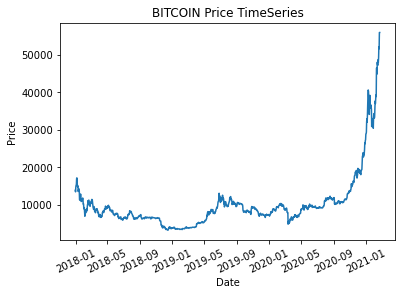

In [12]:
import seaborn as sns

sns.lineplot(x='Date', y='Price', data=bitcoin_hst)
plt.xticks(rotation=25)
plt.title('BITCOIN Price TimeSeries')
plt.show()

Probably we should plot some information grouped by the date sub-attributes so that's why the next code.

In [13]:
cardano_hst = cardano_hst.set_index('Date')

cardano_hst['Year'] = cardano_hst.index.year
cardano_hst['Month'] = cardano_hst.index.month
cardano_hst['Day'] = cardano_hst.index.day

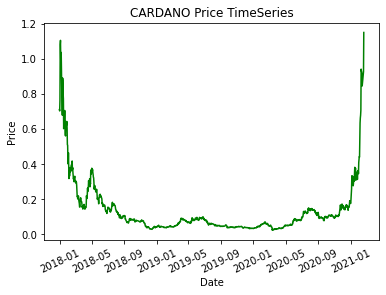

In [14]:
sns.lineplot(x="Date", y="Price", data=cardano_hst, color='green')
plt.xticks(rotation=25)
plt.title('CARDANO Price TimeSeries')
plt.show()

In [15]:
bitcoin_hst['Change'] = bitcoin_hst['Change'].str.replace('%', '')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('B', '000000000')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('M', '000000')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('K', '000')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('.', '')
#bitcoin_hst = bitcoin_hst.drop(columns=['Date'])

<ipython-input-15-afd584413ff3>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('.', '')


In [16]:
bitcoin_hst.head()

,Date,Price,Open,High,Low,Vol,Change,Crypto
0,2021-02-20,55923.7,55922.0,57523.8,54124.1,12785000,0.03,BTC
1,2021-02-19,55906.6,51590.1,56238.5,50816.8,13943000,8.38,BTC
2,2021-02-18,51582.2,52094.5,52524.0,50941.6,9435000,-0.95,BTC
3,2021-02-17,52079.2,49161.3,52577.7,49018.1,14003000,5.92,BTC
4,2021-02-16,49169.7,47934.2,50515.8,47044.4,14137000,2.57,BTC


In [17]:
cardano_hst['Change'] = cardano_hst['Change'].str.replace('%', '')
cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('B', '000000000')
cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('M', '000000')
cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('.', '')
#cardano_hst = cardano_hst.drop(columns=['Date'])

<ipython-input-17-9f8d90b4cd53>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('.', '')


In [18]:
cardano_hst.head()

,Price,Open,High,Low,Vol,Change,Crypto,Year,Month,Day
Date,,,,,,,,,,
2021-02-20,1.149122,0.925955,1.176955,0.914190,180000000000,24.11,ADA,2021,2,20
2021-02-19,0.925894,0.913695,0.945353,0.880769,83910000000,1.33,ADA,2021,2,19
2021-02-18,0.913752,0.891719,0.956599,0.891719,90468000000,2.47,ADA,2021,2,18
2021-02-17,0.891702,0.870390,0.897079,0.823855,75002000000,2.45,ADA,2021,2,17
2021-02-16,0.870393,0.859853,0.905065,0.834791,92987000000,1.19,ADA,2021,2,16


In [19]:
cardano_hst.isnull().any()

Price     False
Open      False
High      False
Low       False
Vol       False
Change    False
Crypto    False
Year      False
Month     False
Day       False
dtype: bool

# 4 Data Analysis for ADA

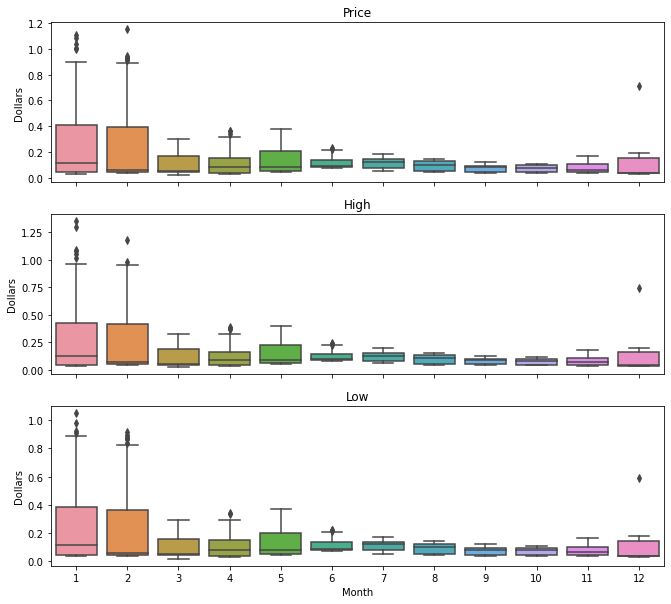

In [21]:
cardano_hst['Month'] = cardano_hst.index.month

ig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Price', 'High', 'Low'], axes):
    sns.boxplot(data=cardano_hst, x='Month', y=name, ax=ax)
    ax.set_ylabel('Dollars')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

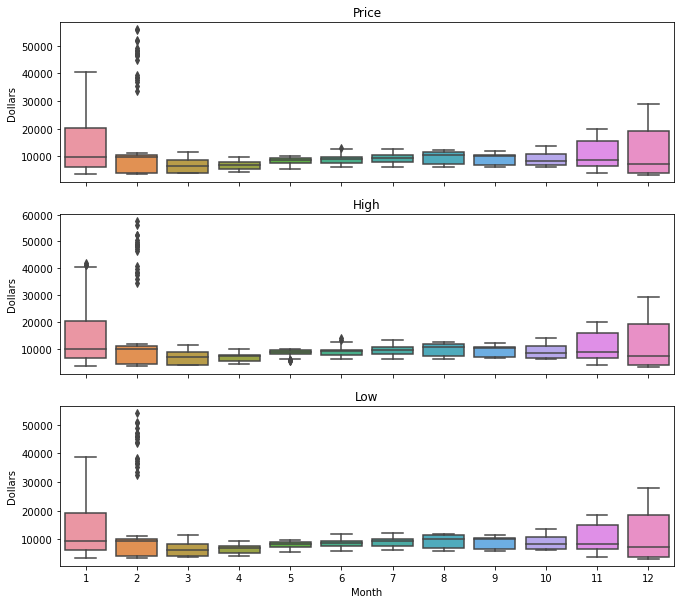

In [22]:
bitcoin_hst = bitcoin_hst.set_index('Date')
bitcoin_hst['Month'] = bitcoin_hst.index.month

ig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Price', 'High', 'Low'], axes):
    sns.boxplot(data=bitcoin_hst, x='Month', y=name, ax=ax)
    ax.set_ylabel('Dollars')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

I am definitely not a trader or a broker but if I wanted to play some money on this I would probably earn more money on January, February, May and December for ADA and the same for BTC but November instead of May.

In [24]:
cardano_hst.dtypes

Price     float64
Open      float64
High      float64
Low       float64
Vol        object
Change     object
Crypto     object
Year        int64
Month       int64
Day         int64
dtype: object

In [40]:
print (cardano_hst[pd.to_numeric(cardano_hst.Vol, errors='coerce').isnull()])

               Price      Open      High       Low Vol Change Crypto  Year  \
Date                                                                         
2021-01-14  0.311028  0.312734  0.324066  0.298576   -  -0.55    ADA  2021   

            Month  Day  
Date                    
2021-01-14      1   14  


In [44]:
cardano_hst = cardano_hst[~cardano_hst.Vol.str.contains("-")]

In [41]:
print (cardano_hst[pd.to_numeric(cardano_hst.Change, errors='coerce').isnull()])

Empty DataFrame
Columns: [Price, Open, High, Low, Vol, Change, Crypto, Year, Month, Day]
Index: []


In [46]:
cardano_hst.loc['Vol'] = pd.to_numeric(cardano_hst['Vol'])
cardano_hst.loc['Change'] = pd.to_numeric(cardano_hst['Change'])

In [47]:
cardano_hst.dtypes

Price     float64
Open      float64
High      float64
Low       float64
Vol       float64
Change    float64
Crypto     object
Year      float64
Month     float64
Day       float64
dtype: object

In [48]:
(cardano_hst.corr()**2)["Price"].sort_values(ascending = False)[1:]

High      0.994051
Low       0.990196
Open      0.984712
Month     0.133492
Change    0.011099
Vol       0.006606
Year      0.003404
Day       0.002516
Name: Price, dtype: float64

In [52]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    #style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

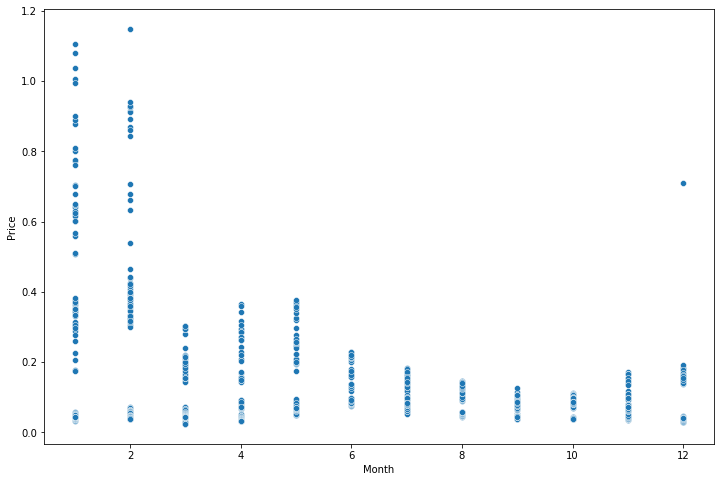

In [53]:
customized_scatterplot(cardano_hst.Price, cardano_hst.Month)

"Month" is a categorical variable, and a scatter plot is not the best way to visualize categorical variables. However, there is an apparent relationship between the two features. The "Price" of ADA decreases along the year. Let's check out some more features to determine the outliers.

# 4 Time Series Forecasting using LinearRegression

I want to keep the "Month" attribute onto the training dataset so I'll convert it into dummy indicator/variable

In [118]:
# Read the data
train = cardano_hst

In [119]:
train.head()

,Price,Open,High,Low,Vol,Change,Crypto,Year,Month,Day
Date,,,,,,,,,,
2021-02-20 00:00:00,1.149122,0.925955,1.176955,0.914190,1.800000e+11,24.11,ADA,2021.0,2.0,20.0
2021-02-19 00:00:00,0.925894,0.913695,0.945353,0.880769,8.391000e+10,1.33,ADA,2021.0,2.0,19.0
2021-02-18 00:00:00,0.913752,0.891719,0.956599,0.891719,9.046800e+10,2.47,ADA,2021.0,2.0,18.0
2021-02-17 00:00:00,0.891702,0.870390,0.897079,0.823855,7.500200e+10,2.45,ADA,2021.0,2.0,17.0
2021-02-16 00:00:00,0.870393,0.859853,0.905065,0.834791,9.298700e+10,1.19,ADA,2021.0,2.0,16.0


In [120]:
dummy = pd.get_dummies(train['Month'])

In [121]:
train = pd.concat([train, dummy], axis=1)
train.head()

,Price,Open,High,Low,Vol,Change,Crypto,Year,Month,Day,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-20 00:00:00,1.149122,0.925955,1.176955,0.914190,1.800000e+11,24.11,ADA,2021.0,2.0,20.0,...,0,0,0,0,0,0,0,0,0,0
2021-02-19 00:00:00,0.925894,0.913695,0.945353,0.880769,8.391000e+10,1.33,ADA,2021.0,2.0,19.0,...,0,0,0,0,0,0,0,0,0,0
2021-02-18 00:00:00,0.913752,0.891719,0.956599,0.891719,9.046800e+10,2.47,ADA,2021.0,2.0,18.0,...,0,0,0,0,0,0,0,0,0,0
2021-02-17 00:00:00,0.891702,0.870390,0.897079,0.823855,7.500200e+10,2.45,ADA,2021.0,2.0,17.0,...,0,0,0,0,0,0,0,0,0,0
2021-02-16 00:00:00,0.870393,0.859853,0.905065,0.834791,9.298700e+10,1.19,ADA,2021.0,2.0,16.0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
print(train.columns)

Index([ 'Price',   'Open',   'High',    'Low',    'Vol', 'Change', 'Crypto',
         'Year',  'Month',    'Day',      1.0,      2.0,      3.0,      4.0,
            5.0,      6.0,      7.0,      8.0,      9.0,     10.0,     11.0,
           12.0],
      dtype='object')


Check for null rows values

In [123]:
train['Open'].isnull().values.any()

True

In [124]:
train['Low'].isnull().sum()

2

In [125]:
train.isnull().sum().sum()

20

In [126]:
train = train.dropna()

Taking into account the most significant attributes we separate the predictors from the target.

In [127]:
# pull data into target (y) and predictors (X)
y = train.Price
predictor_cols = ['Open', 'High', 'Low', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

# Create training predictors data
X = train[predictor_cols]

#my_model = RandomForestRegressor()
#my_model.fit(train_X, train_y)

In [128]:
X.head()

,Open,High,Low,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Date,,,,,,,,,,,,,,,
2021-02-20 00:00:00,0.925955,1.176955,0.914190,0,1,0,0,0,0,0,0,0,0,0,0
2021-02-19 00:00:00,0.913695,0.945353,0.880769,0,1,0,0,0,0,0,0,0,0,0,0
2021-02-18 00:00:00,0.891719,0.956599,0.891719,0,1,0,0,0,0,0,0,0,0,0,0
2021-02-17 00:00:00,0.870390,0.897079,0.823855,0,1,0,0,0,0,0,0,0,0,0,0
2021-02-16 00:00:00,0.859853,0.905065,0.834791,0,1,0,0,0,0,0,0,0,0,0,0


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .25, random_state = 0)

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred).round(4))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred).round(4))
print('Train accuracy: %.2f'
      % lin_reg.score(X_train, y_train).round(4))
print('Test accuracy: %.2f'
      % lin_reg.score(X_test, y_test).round(4))

Mean squared error: 0.00
Coefficient of determination: 1.00
Train accuracy: 1.00
Test accuracy: 1.00


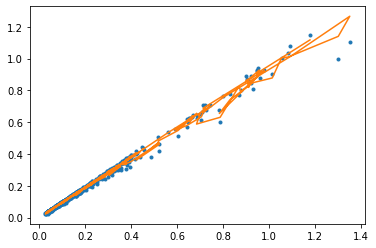

In [133]:
# Plot outputs
plt.plot(X.High, y.values,'.')
plt.plot(X.High, lin_reg.predict(X),'-')
plt.show()

We got an overfitted LinearRegression model as you can see. Here is an example with the attribute High, which is the most significant one.

# 5 Time Series Forecasting using LinearRegression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

In [149]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
## fit train and test data. 
clf.fit(X_train, y_train)
## Predict test data. 
y_pred_ridge = clf.predict(X_test)

In [150]:
print('Train accuracy: %.2f'
      % clf.score(X_train, y_train).round(4))
print('Test accuracy: %.2f'
      % clf.score(X_test, y_test).round(4))

Train accuracy: 0.99
Test accuracy: 0.99


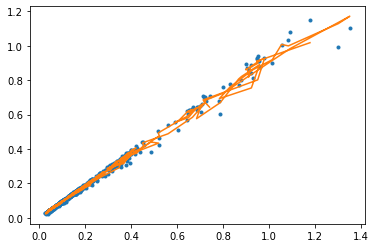

In [151]:
# Plot outputs
plt.plot(X.High, y.values,'.')
plt.plot(X.High, clf.predict(X),'-')
plt.show()

In [154]:
from sklearn.ensemble import RandomForestRegressor